In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV,  KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

files=["completeSpamAssassin.csv", "enronSpamSubset.csv", "lingSpam.csv"]

dfs = [pd.read_csv(file) for file in files]

for df in dfs:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(combined_df["Body"], combined_df["Label"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [4]:
param_grid = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': [2, 5, 10],
}

clf = DecisionTreeClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy', return_train_score=True)
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [10]:
best_estimator = grid_search.best_estimator_
print(best_estimator)
best_estimator.fit(X_train_tfidf, y_train)
y_train_pred = best_estimator.predict(X_train_tfidf)
y_test_pred = best_estimator.predict(X_test_tfidf)

DecisionTreeClassifier(max_depth=18, min_samples_split=5)


In [11]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       988
           1       0.94      0.96      0.95      1012

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



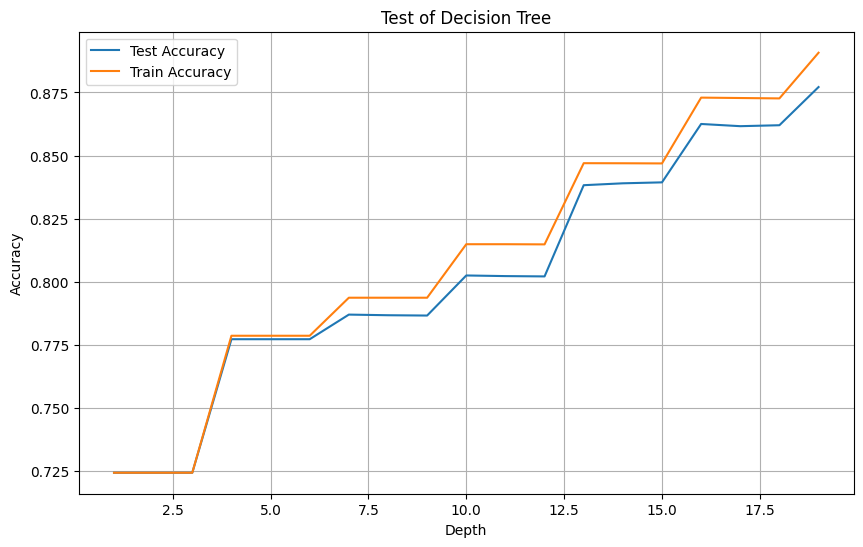

In [14]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_test_scores[:len(param_grid['max_depth'])], label='Test Accuracy')
plt.plot(param_grid['max_depth'], mean_train_scores[:len(param_grid['max_depth'])], label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Test of Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
print("Best Parameters:", best_params)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'max_depth': 18, 'min_samples_split': 5}
Training Accuracy: 0.971625
Test Accuracy: 0.9485


In [1]:
# With Kfold
# Best Parameters: {'max_depth': 18, 'min_samples_split': 5}
# Training Accuracy: 0.966875
# Test Accuracy: 0.9415